# Employee Attrition Prediction Project

## Overview
This project aims to predict employee attrition using a dataset containing various employee attributes. The focus is on understanding attrition patterns, preprocessing data, and building a predictive model using machine learning techniques, with an emphasis on XGBoost.

## Objectives
- Explore the dataset to identify key factors influencing attrition.
- Preprocess data to handle missing values, encode categorical variables, and balance classes.
- Train and evaluate machine learning models, optimizing for performance metrics like F1-score and ROC-AUC.
- Provide actionable insights from visualizations and model results to inform retention strategies.

# import libraries

In [37]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler,MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.inspection import PartialDependenceDisplay
from scipy.stats import iqr
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from scipy.stats import ttest_ind
from scipy.stats import spearmanr
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectKBest, chi2,f_classif
from collections import Counter
from IPython.display import display
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
import joblib
import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [38]:
train_data=pd.read_csv(r"C:\Users\User\Downloads\depi project\employee_attrition_train.csv")
test_data=pd.read_csv(r"C:\Users\User\Downloads\depi project\employee_attrition_test.csv")

# Exploratory Data Analysis (EDA)
Analyze the dataset to understand its structure, distributions, and relationships.

In [39]:
train_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,50.0,No,Travel_Rarely,1126.0,Research & Development,1.0,2,Medical,1,997,4,Male,66,3,4,Research Director,4,Divorced,17399,6615,9,Y,No,22,4,3,80,1,32,1,2,5,4,1,3
1,36.0,No,Travel_Rarely,216.0,Research & Development,6.0,2,Medical,1,178,2,Male,84,3,2,Manufacturing Director,2,Divorced,4941,2819,6,Y,No,20,4,4,80,2,7,0,3,3,2,0,1
2,21.0,Yes,Travel_Rarely,337.0,Sales,7.0,1,Marketing,1,1780,2,Male,31,3,1,Sales Representative,2,Single,2679,4567,1,Y,No,13,3,2,80,0,1,3,3,1,0,1,0
3,50.0,No,Travel_Frequently,1246.0,Human Resources,NaN,3,Medical,1,644,1,Male,99,3,5,Manager,2,Married,18200,7999,1,Y,No,11,3,3,80,1,32,2,3,32,5,10,7
4,52.0,No,Travel_Rarely,994.0,Research & Development,7.0,4,Life Sciences,1,1118,2,Male,87,3,3,Healthcare Representative,2,Single,10445,15322,7,Y,No,19,3,4,80,0,18,4,3,8,6,4,0


In [40]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1029 entries, 0 to 1028
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       893 non-null    float64
 1   Attrition                 1029 non-null   object 
 2   BusinessTravel            1024 non-null   object 
 3   DailyRate                 1002 non-null   float64
 4   Department                1029 non-null   object 
 5   DistanceFromHome          934 non-null    float64
 6   Education                 1029 non-null   int64  
 7   EducationField            1029 non-null   object 
 8   EmployeeCount             1029 non-null   int64  
 9   EmployeeNumber            1029 non-null   int64  
 10  EnvironmentSatisfaction   1029 non-null   int64  
 11  Gender                    1029 non-null   object 
 12  HourlyRate                1029 non-null   int64  
 13  JobInvolvement            1029 non-null   int64  
 14  JobLevel

In [41]:
#check balance of the data
print(train_data['Attrition'].value_counts())
print(train_data['Attrition'].value_counts(normalize=True))

Attrition
No     853
Yes    176
Name: count, dtype: int64
Attrition
No     0.82896
Yes    0.17104
Name: proportion, dtype: float64


In [42]:
eda_summary = {
    "Column": train_data.columns,
    "Missing Values": train_data.isnull().sum().values,
    "Data Type": train_data.dtypes.values,
    "Unique Values": train_data.nunique().values
}
train_eda_df = pd.DataFrame(eda_summary)
print(train_eda_df)
train_numeric_description = train_data.describe(include='number')
train_categorical_description = train_data.describe(include='object')

                      Column  Missing Values Data Type  Unique Values
0                        Age             136   float64             39
1                  Attrition               0    object              2
2             BusinessTravel               5    object              3
3                  DailyRate              27   float64            692
4                 Department               0    object              3
5           DistanceFromHome              95   float64             27
6                  Education               0     int64              5
7             EducationField               0    object              6
8              EmployeeCount               0     int64              1
9             EmployeeNumber               0     int64           1029
10   EnvironmentSatisfaction               0     int64              4
11                    Gender               0    object              2
12                HourlyRate               0     int64             71
13            JobInv

In [43]:
train_numeric_description

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,893.000000,1002.000000,934.000000,1029.000000,1029.0,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.0,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000
mean,37.930571,800.528942,9.930407,2.892128,1.0,1024.367347,2.683188,66.680272,2.713314,2.043732,2.712342,6449.796890,14250.629738,2.653061,15.260447,3.159378,2.689990,80.0,0.822157,11.196307,2.782313,2.748299,6.942663,4.215743,2.119534,4.005831
std,9.395978,408.109828,8.421791,1.053541,0.0,606.301635,1.096829,20.474094,0.710146,1.118918,1.096889,4794.525367,7088.757938,2.508186,3.665779,0.366206,1.077767,0.0,0.874662,7.857581,1.283401,0.697278,6.068322,3.658595,3.108651,3.522574
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,458.250000,2.000000,2.000000,1.0,496.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2814.000000,7950.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,37.000000,801.500000,8.000000,3.000000,1.0,1019.000000,3.000000,67.000000,3.000000,2.000000,3.000000,4735.000000,14295.000000,1.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,44.000000,1162.000000,16.000000,4.000000,1.0,1553.000000,4.000000,84.000000,3.000000,3.000000,4.000000,8446.000000,20392.000000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,10.000000,7.000000,2.000000,7.000000
max,60.000000,1496.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


In [44]:
train_categorical_description

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1029,1024,1029,1029,1029,1029,1024,1029,1029
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,853,723,676,426,617,217,474,1029,731


In [45]:
duplicates_train = train_data.duplicated().sum()
duplicates_train

np.int64(0)

### EDA Insights
- **Class Imbalance**: The dataset is imbalanced, with ~82.9% of employees staying ('No') and ~17.1% leaving ('Yes'). This suggests the need for class balancing techniques like Borderline-SMOTE.
- **Missing Values**: Key columns with missing values include `Age` (136 missing), `DistanceFromHome` (95 missing), `DailyRate` (27 missing), `BusinessTravel` (5 missing), and `MaritalStatus` (5 missing), requiring imputation.
- **Duplicates**: there is no duplicated data
- **Feature Diversity**: The dataset contains numerical features (e.g., `Age`, `MonthlyIncome`, `YearsAtCompany`) and categorical features (e.g., `BusinessTravel`, `Department`, `JobRole`), necessitating appropriate preprocessing.

#  potential relationships between features and employee attrition

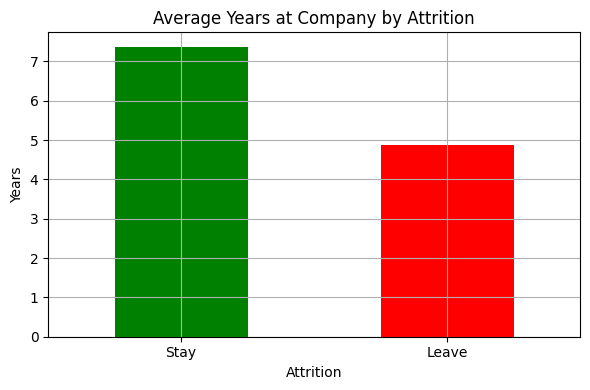

In [46]:
plt.figure(figsize=(6, 4))
train_data.groupby('Attrition')['YearsAtCompany'].mean().plot(kind='bar', color=['green', 'red'])
plt.title("Average Years at Company by Attrition")
plt.ylabel("Years")
plt.xticks(ticks=[0,1], labels=['Stay','Leave'], rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()

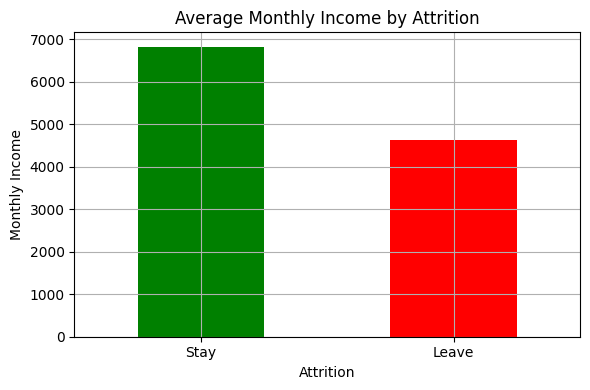

In [47]:
# Average income by attrition
plt.figure(figsize=(6, 4))
train_data.groupby('Attrition')['MonthlyIncome'].mean().plot(kind='bar', color=['green', 'red'])
plt.title("Average Monthly Income by Attrition")
plt.ylabel("Monthly Income")
plt.xticks(ticks=[0,1], labels=['Stay','Leave'], rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()

<Figure size 800x500 with 0 Axes>

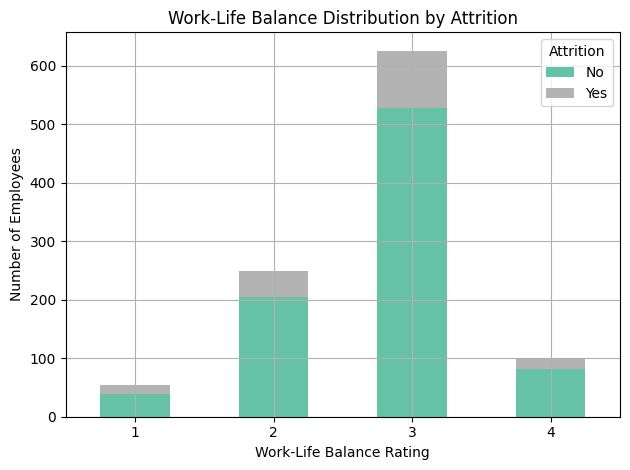

In [48]:
# Work-life balance count by attrition
plt.figure(figsize=(8, 5))
worklife_counts = train_data.groupby(['WorkLifeBalance', 'Attrition']).size().unstack()
worklife_counts.plot(kind='bar', stacked=True, colormap='Set2')
plt.title("Work-Life Balance Distribution by Attrition")
plt.ylabel("Number of Employees")
plt.xlabel("Work-Life Balance Rating")
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()

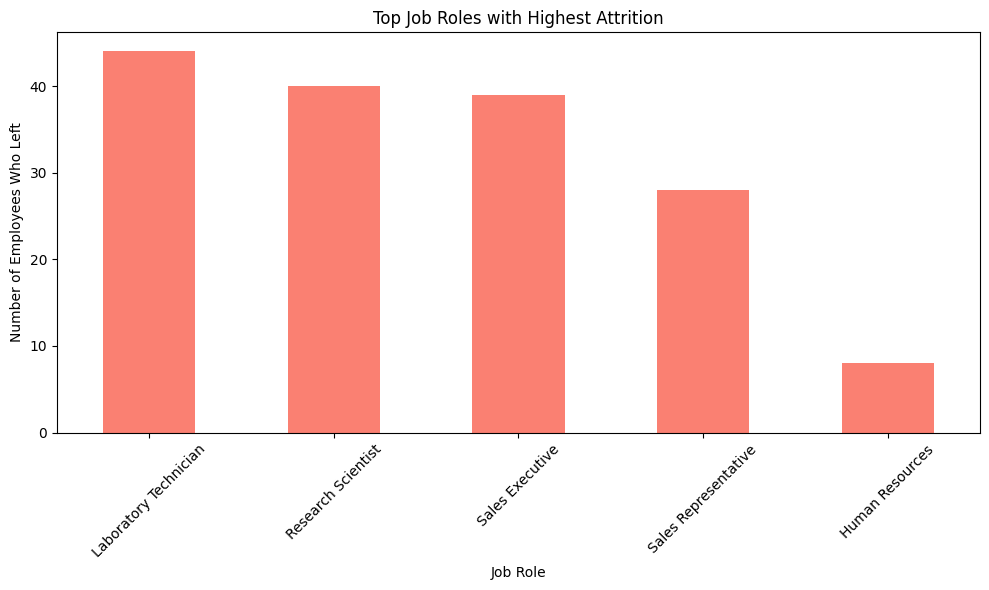

In [49]:
# Filter employees who left (Attrition == 'Yes')
left_employees = train_data[train_data['Attrition'] == 'Yes']

top_roles = left_employees['JobRole'].value_counts().head()
plt.figure(figsize=(10, 6))
top_roles.plot(kind='bar', color='salmon')
plt.title('Top Job Roles with Highest Attrition')
plt.xlabel('Job Role')
plt.ylabel('Number of Employees Who Left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

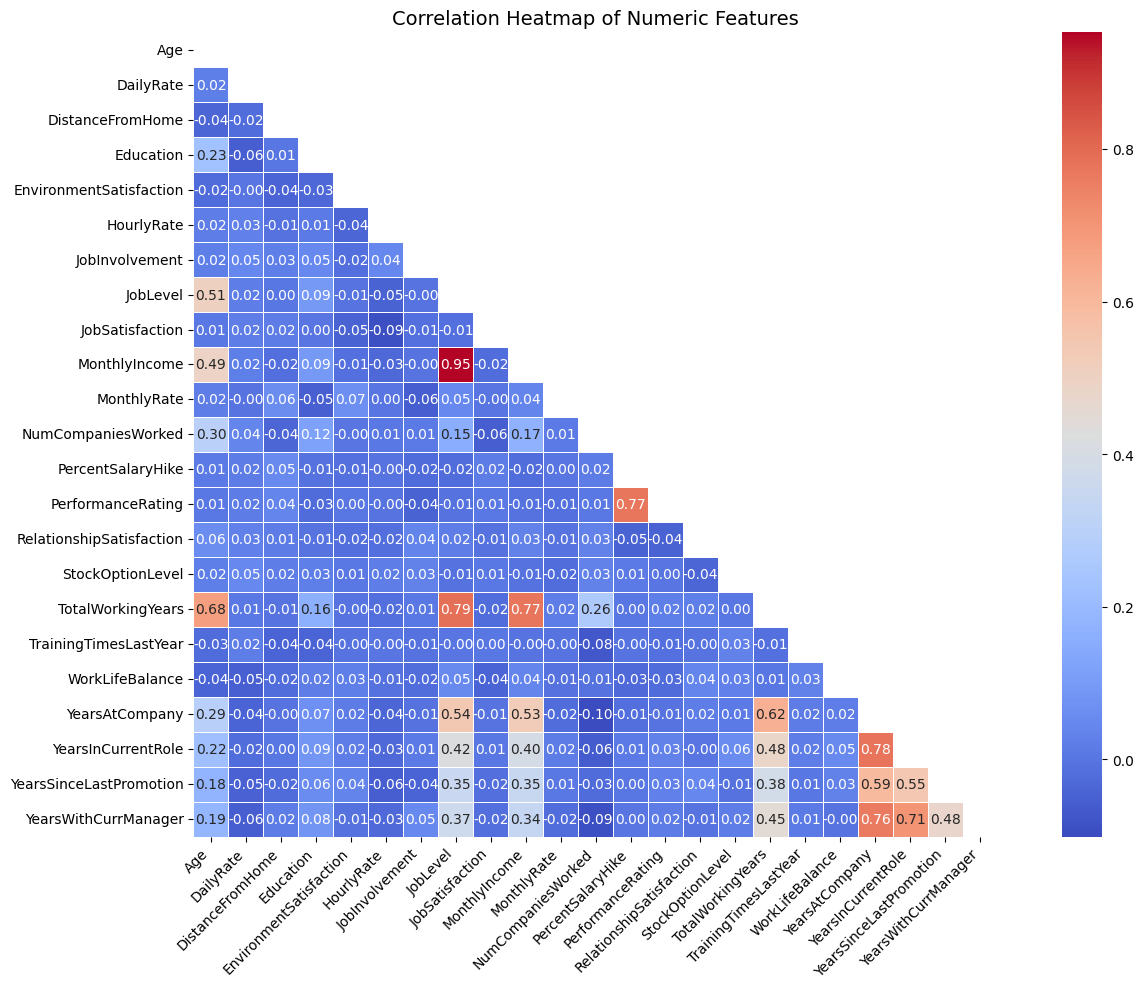

In [50]:
plt.figure(figsize=(14, 10))
corr = train_data.select_dtypes(include=['int64', 'float64']).drop(columns=['EmployeeCount', 'StandardHours', 'EmployeeNumber']).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [51]:
upper_tri = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
top_corr = upper_tri.abs().unstack().dropna().sort_values(ascending=False).head(10)

print("\nTop 10 strongest correlations between numeric features:")
print(top_corr)



Top 10 strongest correlations between numeric features:
MonthlyIncome            JobLevel              0.952756
TotalWorkingYears        JobLevel              0.786130
YearsInCurrentRole       YearsAtCompany        0.777925
PerformanceRating        PercentSalaryHike     0.774110
TotalWorkingYears        MonthlyIncome         0.773499
YearsWithCurrManager     YearsAtCompany        0.759755
                         YearsInCurrentRole    0.705717
TotalWorkingYears        Age                   0.676650
YearsAtCompany           TotalWorkingYears     0.624096
YearsSinceLastPromotion  YearsAtCompany        0.592912
dtype: float64


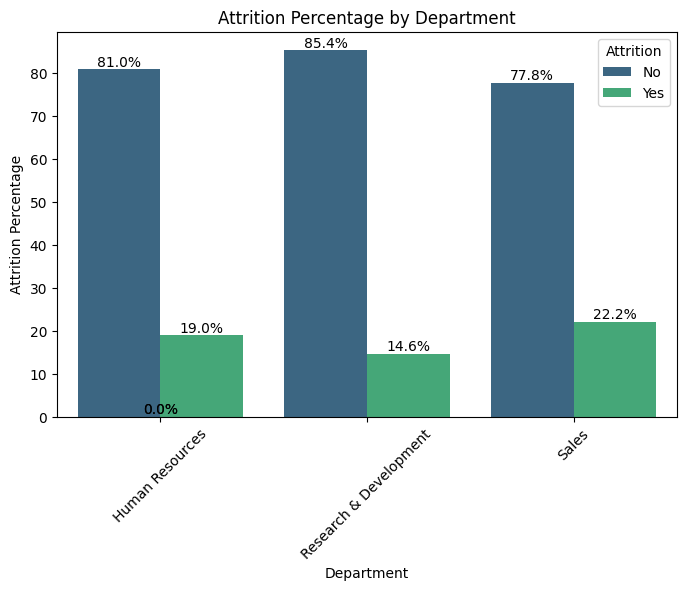

In [52]:
dept_attrition = (
    train_data.groupby("Department")["Attrition"]
    .value_counts()
    .mul(100)
    .rename("Percent")
    .reset_index()
)
dept_total = train_data.groupby("Department").size().reset_index(name='Total')
dept_counts = train_data.groupby(["Department", "Attrition"]).size().reset_index(name='Count')
dept_attrition = pd.merge(dept_counts, dept_total, on="Department")
dept_attrition["Percent"] = dept_attrition["Count"] / dept_attrition["Total"] * 100


plt.figure(figsize=(8, 5))
ax = sns.barplot(x="Department", y="Percent", hue="Attrition", data=dept_attrition, palette="viridis")
plt.title("Attrition Percentage by Department")
plt.xlabel("Department")
plt.ylabel("Attrition Percentage")
plt.xticks(rotation=45)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}%', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom', 
                fontsize=10, color='black')

plt.legend(title="Attrition")
plt.show()

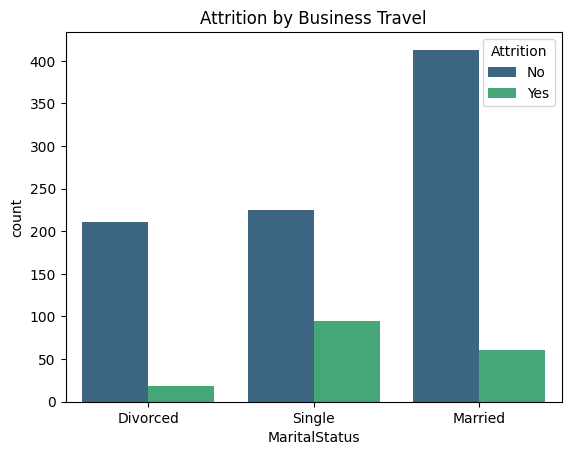

In [53]:
sns.countplot(x="MaritalStatus", hue="Attrition", data=train_data, palette="viridis")
plt.title("Attrition by Business Travel")
plt.show()

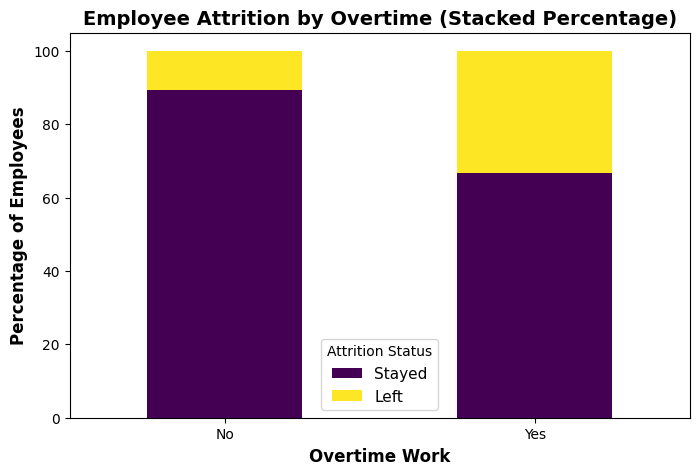

In [54]:
cross_tab = pd.crosstab(train_data["OverTime"], train_data["Attrition"], normalize='index') * 100  
cross_tab.plot(kind="bar", stacked=True, colormap="viridis", figsize=(8, 5))

plt.title("Employee Attrition by Overtime (Stacked Percentage)", fontsize=14, fontweight="bold")
plt.xlabel("Overtime Work", fontsize=12, fontweight="bold")
plt.ylabel("Percentage of Employees", fontsize=12, fontweight="bold")
plt.xticks(rotation=0)
plt.legend(["Stayed", "Left"], title="Attrition Status", fontsize=11)

plt.show()


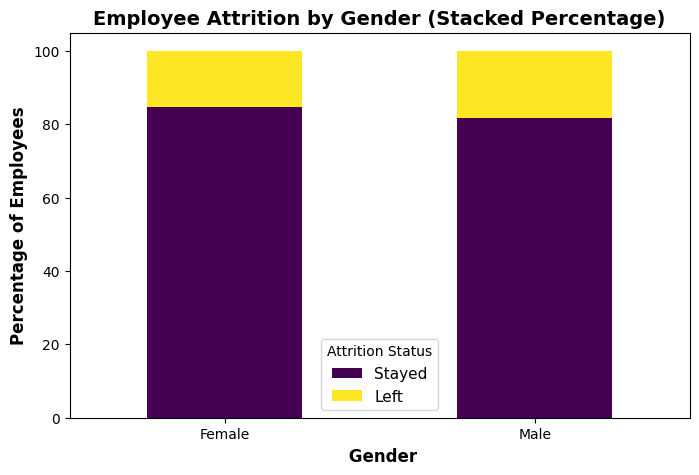

In [55]:
cross_tab = pd.crosstab(train_data["Gender"], train_data["Attrition"], normalize='index') * 100  

cross_tab.plot(kind="bar", stacked=True, colormap="viridis", figsize=(8, 5))

plt.title("Employee Attrition by Gender (Stacked Percentage)", fontsize=14, fontweight="bold")
plt.xlabel(" Gender", fontsize=12, fontweight="bold")
plt.ylabel("Percentage of Employees", fontsize=12, fontweight="bold")
plt.xticks(rotation=0)
plt.legend(["Stayed", "Left"], title="Attrition Status", fontsize=11)

plt.show()


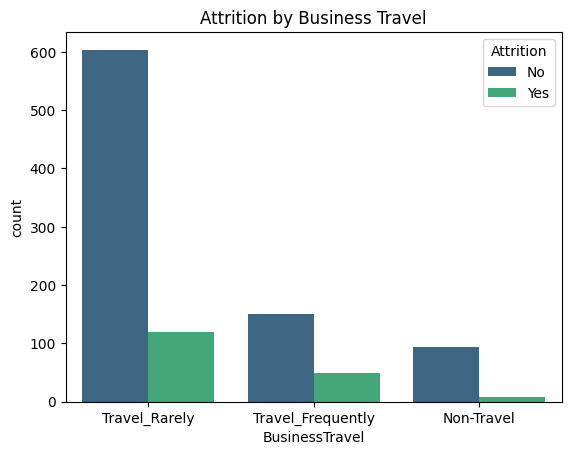

In [56]:
sns.countplot(x="BusinessTravel", hue="Attrition", data=train_data, palette="viridis")
plt.title("Attrition by Business Travel")
plt.show()


### 📊 General Insights from Visualizations:
- Employees who left the company had, on average, **fewer years at the company** compared to those who stayed.

- **Monthly income** is noticeably **lower** among employees who left, suggesting a link between pay and attrition.

- **Poor work-life balance** ratings are more common among employees who left.

- The Sales Executive and Laboratory Technician roles had the highest number of people leaving.

- The **Sales department** has the highest attrition percentage among all departments.

- **Single employees** are more likely to leave than married or divorced ones.

- Employees who work **overtime** have a significantly higher attrition rate.

- Employees who **travel frequently** for business are more likely to leave the company.



# Examine for outliers

In [57]:
def detect_outlier_bounds(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

In [58]:
def cap_outliers(df, column, lower_bound, upper_bound):
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

In [59]:
def visualize_outliers(train_data, numerical_cols, outlier_features, save_path=None):
    fig, axs = plt.subplots(3, 3, figsize=(24, 18))
    colors = ['skyblue', 'lightcoral', 'palegreen', 'khaki', 'plum', 'salmon', 'lightseagreen', 'gold', 'lightpink']
    axs = axs.flatten()
    
    for i, col in enumerate(outlier_features):
        if col in numerical_cols:
            lower, upper = detect_outlier_bounds(train_data, col)
            sns.boxplot(data=train_data, y=col, color=colors[i % len(colors)], ax=axs[i])
            axs[i].axhline(y=lower, color='red', linestyle='--', label='Lower Bound')
            axs[i].axhline(y=upper, color='darkred', linestyle='--', label='Upper Bound')
            axs[i].set_title(f"Outlier Detection for {col}", fontsize=11)
            axs[i].legend()
            axs[i].grid(True, linestyle='--', alpha=0.5)
    
    plt.tight_layout()
    if save_path:
        plt.savefig(save_path)
    plt.show()

# Preprocessing

In [60]:
def preprocess_data(train_data, test_data, target_col='Attrition', outlier_features=None):

    train_data = train_data.copy()
    test_data = test_data.copy()
    
    numeric_cols = train_data.select_dtypes(include=['float64', 'int64']).columns
    categorical_cols = train_data.select_dtypes(include=['object']).columns
    numeric_cols = [col for col in numeric_cols if col != target_col]
    categorical_features = [col for col in categorical_cols if col != target_col]
    
    if outlier_features is None:
        outlier_features = []
        for col in numeric_cols:
            lower, upper = detect_outlier_bounds(train_data, col)
            outliers = train_data[(train_data[col] < lower) | (train_data[col] > upper)]
            if outliers.shape[0] > 0:
                outlier_features.append(col)
    
    if outlier_features:
        visualize_outliers(train_data, numeric_cols, outlier_features)
    
    outlier_bounds = {}
    for col in outlier_features:
        lower, upper = detect_outlier_bounds(train_data, col)
        outlier_bounds[col] = (lower, upper)
        print(f"{col}: {train_data[(train_data[col] < lower) | (train_data[col] > upper)].shape[0]} outliers detected")
        train_data = cap_outliers(train_data, col, lower, upper)
        test_data = cap_outliers(test_data, col, lower, upper)
        print(f"{col}: Outliers capped at [{lower:.2f}, {upper:.2f}]")
    
    num_imputer = SimpleImputer(strategy='mean')
    cat_imputer = SimpleImputer(strategy='most_frequent')
    
    train_data[numeric_cols] = num_imputer.fit_transform(train_data[numeric_cols])
    train_data[categorical_cols] = cat_imputer.fit_transform(train_data[categorical_cols])
    
    test_data[numeric_cols] = num_imputer.transform(test_data[numeric_cols])
    test_data[categorical_cols] = cat_imputer.transform(test_data[categorical_cols])
    
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numeric_cols),
            ('cat', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), categorical_features)
        ]
    )
    
    X_train = train_data.drop(columns=[target_col])
    y_train = train_data[target_col]
    X_train_processed = preprocessor.fit_transform(X_train)
    
    X_test = test_data.drop(columns=[target_col], errors='ignore')
    X_test_processed = preprocessor.transform(X_test)
    
    feature_names = (numeric_cols + 
                     preprocessor.named_transformers_['cat']
                     .get_feature_names_out(categorical_features).tolist())
    train_data_processed = pd.DataFrame(X_train_processed, columns=feature_names)
    test_data_processed = pd.DataFrame(X_test_processed, columns=feature_names)
    
    return train_data_processed, test_data_processed, preprocessor

###   Preprocessing Insights
- Outliers were detected using the IQR method and capped to reduce their impact on model performance.

- Numerical columns were scaled using StandardScaler to ensure all features have equal weight in the model.

- Categorical features were encoded using OneHotEncoder to make them suitable for machine learning models.

- Missing values in numerical columns were filled with the mean, and categorical ones were imputed with the most frequent category.

- Both training and testing data were processed consistently to avoid data leakage and ensure generalization.

- The final preprocessed dataset is clean, scaled, encoded, and ready for training machine learning models.



# Advanced Data Analysis

## T TEST

اfeatures to be testedا: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


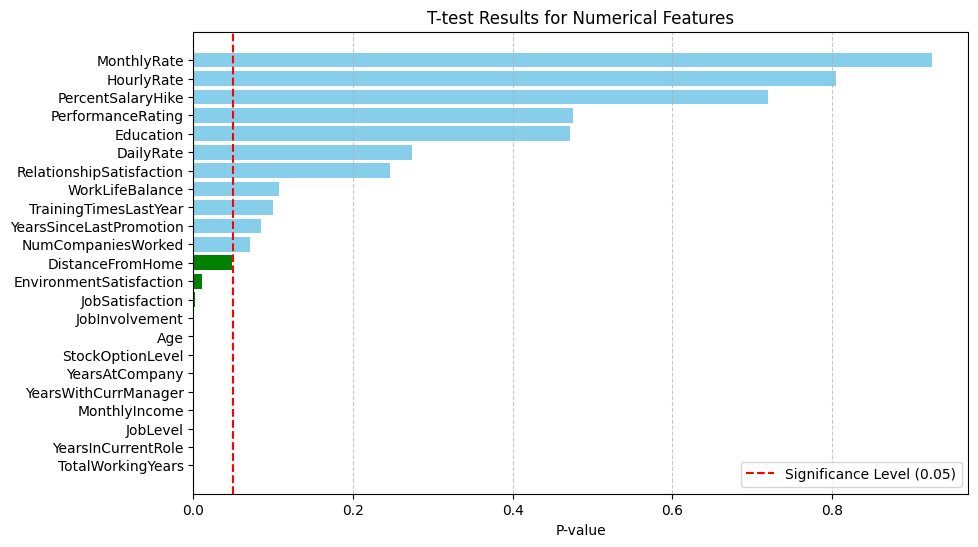


results T-test:
                     Feature  T-statistic       P-value
16         TotalWorkingYears    -7.045674  1.488232e-11
20        YearsInCurrentRole    -6.792197  6.538348e-11
7                   JobLevel    -6.652703  1.444230e-10
9              MonthlyIncome    -6.624791  1.530173e-10
22      YearsWithCurrManager    -5.706515  2.943529e-08
19            YearsAtCompany    -5.222654  3.583305e-07
15          StockOptionLevel    -5.034921  9.217744e-07
0                        Age    -4.883071  1.915293e-06
6             JobInvolvement    -3.946891  1.040829e-04
8            JobSatisfaction    -3.221056  1.448409e-03
4    EnvironmentSatisfaction    -2.560160  1.106867e-02
2           DistanceFromHome     1.983462  4.841208e-02
11        NumCompaniesWorked     1.810911  7.144449e-02
21   YearsSinceLastPromotion    -1.727934  8.514732e-02
17     TrainingTimesLastYear    -1.651679  9.984821e-02
18           WorkLifeBalance    -1.614496  1.077611e-01
14  RelationshipSatisfaction   

In [61]:
def run_ttest(train_data, target_col='Attrition'):
    if train_data.select_dtypes(include=['int64', 'float64']).isna().any().any():
        print("Warning: Numerical columns contain missing values. Imputing with mean...")
        train_data = train_data.fillna(train_data.select_dtypes(include=['int64', 'float64']).mean())
    
    attrition_yes = train_data[train_data[target_col] == 'Yes']
    attrition_no = train_data[train_data[target_col] == 'No']
    
    all_numerical_cols = train_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
    excluded_cols = ['EmployeeNumber', 'EmployeeCount', 'Over18', 'StandardHours']
    numerical_cols = [col for col in all_numerical_cols if col not in excluded_cols]
    
    meaningful_numerical_cols = [col for col in numerical_cols if train_data[col].nunique() > 1]
    print("اfeatures to be testedا:", meaningful_numerical_cols)
    
    ttest_results = []
    for feature in meaningful_numerical_cols:
        stat, pvalue = ttest_ind(attrition_yes[feature], attrition_no[feature], equal_var=False)
        ttest_results.append({'Feature': feature, 'T-statistic': stat, 'P-value': pvalue})
    
    ttest_df = pd.DataFrame(ttest_results)
    ttest_df = ttest_df.sort_values('P-value')
    
    plt.figure(figsize=(10, 6))
    colors = ['green' if p < 0.05 else 'skyblue' for p in ttest_df['P-value']]
    plt.barh(ttest_df['Feature'], ttest_df['P-value'], color=colors)
    plt.axvline(0.05, color='red', linestyle='--', label='Significance Level (0.05)')
    plt.xlabel('P-value')
    plt.title('T-test Results for Numerical Features')
    plt.legend()
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()
    
    return ttest_df

ttest_df = run_ttest(train_data)
print("\nresults T-test:")
print(ttest_df)

## Spearman Correlation Matrix

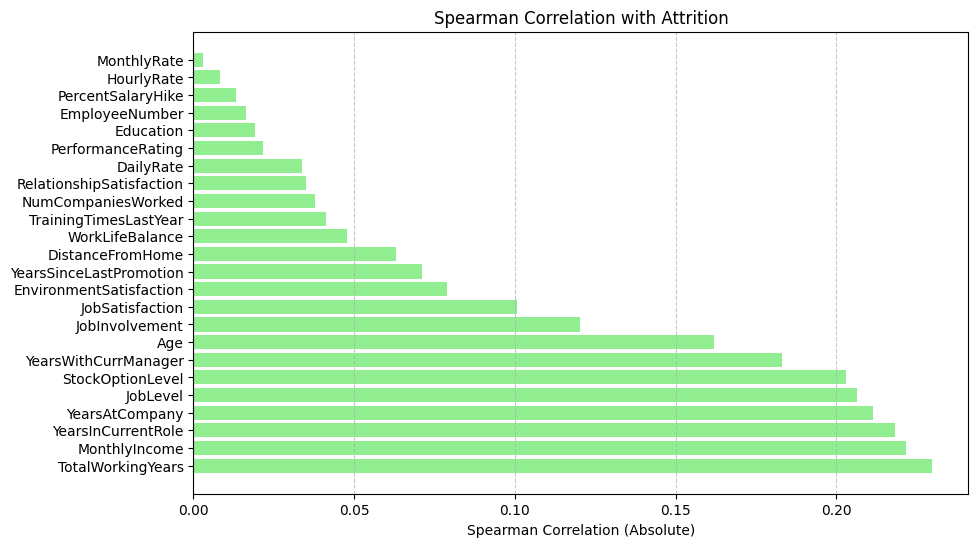

Spearman Correlation Matrix:
                     Feature  Spearman Correlation
0          TotalWorkingYears              0.229615
1              MonthlyIncome              0.221518
2         YearsInCurrentRole              0.218152
3             YearsAtCompany              0.211385
4                   JobLevel              0.206308
5           StockOptionLevel              0.202859
6       YearsWithCurrManager              0.183188
7                        Age              0.161907
8             JobInvolvement              0.120111
9            JobSatisfaction              0.100495
10   EnvironmentSatisfaction              0.078954
11   YearsSinceLastPromotion              0.070948
12          DistanceFromHome              0.062918
13           WorkLifeBalance              0.047810
14     TrainingTimesLastYear              0.041192
15        NumCompaniesWorked              0.037664
16  RelationshipSatisfaction              0.035157
17                 DailyRate              0.033872
18

In [62]:
def run_spearman_correlation(train_data, target_col='Attrition'):
    df_spearman = train_data.copy()
    
    if df_spearman.select_dtypes(include=['float64', 'int64']).isna().any().any():
        print("Warning: Numerical columns contain missing values. Imputing with mean...")
        df_spearman = df_spearman.fillna(df_spearman.select_dtypes(include=['float64', 'int64']).mean())
    
    df_spearman[target_col] = df_spearman[target_col].map({'Yes': 1, 'No': 0})
    
    useless_cols = [col for col in df_spearman.columns if df_spearman[col].nunique() <= 1]
    df_spearman = df_spearman.drop(useless_cols, axis=1)
    
    numeric_cols = df_spearman.select_dtypes(include=['float64', 'int64']).columns.tolist()
    numeric_cols = [col for col in numeric_cols if col != target_col]
    
    correlation_matrix_spearman, _ = spearmanr(df_spearman[numeric_cols + [target_col]])
    correlation_matrix_spearman_df = pd.DataFrame(correlation_matrix_spearman, index=numeric_cols + [target_col], columns=numeric_cols + [target_col])
    
    spearman_corr = correlation_matrix_spearman_df[target_col].drop(target_col).abs().sort_values(ascending=False)
    
    correlation_spearman_df = pd.DataFrame({
        'Feature': spearman_corr.index,
        'Spearman Correlation': spearman_corr.values
    })
    
    plt.figure(figsize=(10, 6))
    plt.barh(correlation_spearman_df['Feature'], correlation_spearman_df['Spearman Correlation'], color='lightgreen')
    plt.xlabel('Spearman Correlation (Absolute)')
    plt.title('Spearman Correlation with Attrition')
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()
    
    return correlation_spearman_df

correlation_spearman_df = run_spearman_correlation(train_data)
print("Spearman Correlation Matrix:")
print(correlation_spearman_df)

## person colleration

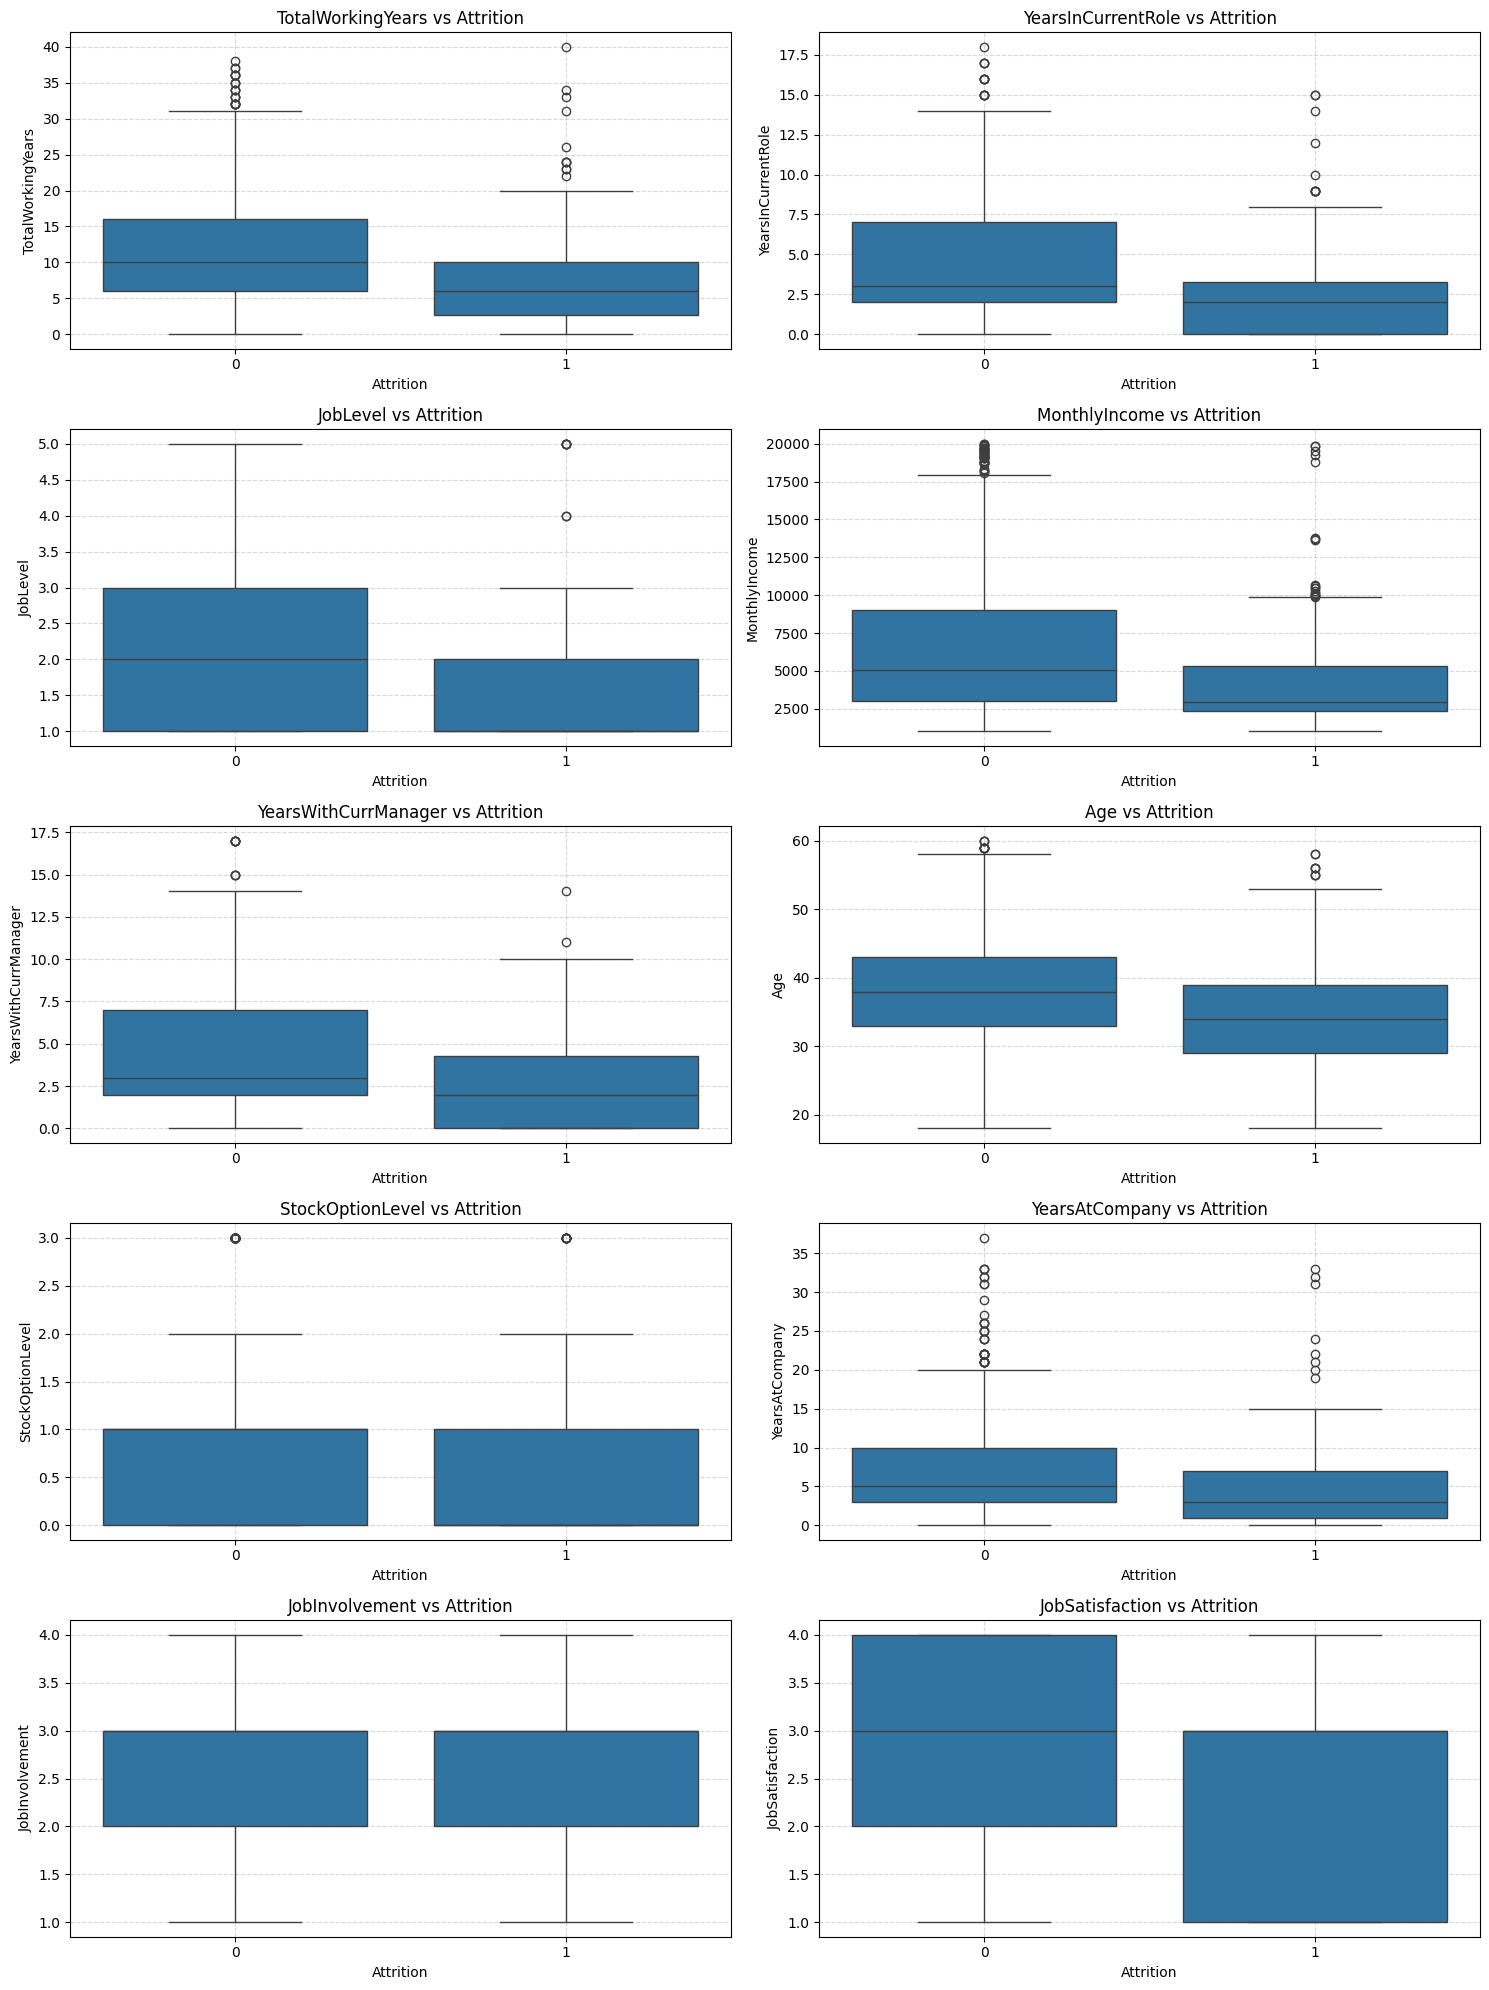

Pearson Correlation Matrix:
                     Feature  Pearson Correlation
17         TotalWorkingYears            -0.199323
21        YearsInCurrentRole            -0.188421
8                   JobLevel            -0.181610
10             MonthlyIncome            -0.171551
23      YearsWithCurrManager            -0.160552
0                        Age            -0.160176
16          StockOptionLevel            -0.158530
20            YearsAtCompany            -0.154422
7             JobInvolvement            -0.129238
9            JobSatisfaction            -0.102101
5    EnvironmentSatisfaction            -0.082964
2           DistanceFromHome             0.062524
12        NumCompaniesWorked             0.061832
19           WorkLifeBalance            -0.054439
18     TrainingTimesLastYear            -0.051681
22   YearsSinceLastPromotion            -0.050700
15  RelationshipSatisfaction            -0.036987
1                  DailyRate            -0.033794
3                  Edu

In [63]:
def run_pearson_correlation(train_data, target_col='Attrition'):
    df_pearson = train_data.copy()
    
    if df_pearson.select_dtypes(include=['float64', 'int64']).isna().any().any():
        print("Warning: Numerical columns contain missing values. Imputing with mean...")
        df_pearson = df_pearson.fillna(df_pearson.select_dtypes(include=['float64', 'int64']).mean())
    
    df_pearson[target_col] = df_pearson[target_col].map({'Yes': 1, 'No': 0})
    
    numeric_cols = df_pearson.select_dtypes(include=['float64', 'int64']).columns.tolist()
    numeric_cols = [col for col in numeric_cols if col != target_col and df_pearson[col].nunique() > 1]
    
    pearson_corr = df_pearson[numeric_cols + [target_col]].corr(method='pearson')[target_col].drop(target_col)
    
    correlation_df = pd.DataFrame({
        'Feature': numeric_cols,
        'Pearson Correlation': pearson_corr.values
    })
    
    correlation_df = correlation_df.reindex(correlation_df['Pearson Correlation'].abs().sort_values(ascending=False).index)
    top_features = correlation_df['Feature'].head(10).tolist()
    fig, axs = plt.subplots(5, 2, figsize=(15, 20))
    axs = axs.flatten()
    
    for i, feature in enumerate(top_features):
        sns.boxplot(x=target_col, y=feature, data=df_pearson, ax=axs[i])
        axs[i].set_title(f"{feature} vs Attrition", fontsize=12)
        axs[i].grid(True, linestyle='--', alpha=0.5)
    
    plt.tight_layout()
    plt.show()
    
    return correlation_df

correlation_df = run_pearson_correlation(train_data)
print("Pearson Correlation Matrix:")
print(correlation_df)

## RFE logestic

In [64]:
warnings.filterwarnings("ignore")

def run_rfe(X, y, estimator, n_features=10):
    X_rfe = X.copy()
    
    categorical_cols = X_rfe.select_dtypes(include='object').columns
    numerical_cols = X_rfe.select_dtypes(include=['int64', 'float64']).columns
    numerical_cols = [col for col in numerical_cols if X_rfe[col].nunique() > 1]
    
    preprocessor = ColumnTransformer([
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'))
        ]), categorical_cols),
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), numerical_cols)
    ])
    
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('rfe', RFE(estimator=estimator, n_features_to_select=n_features))
    ])
    
    pipeline.fit(X_rfe, y)
    
    feature_names = (
        numerical_cols + 
        pipeline.named_steps['preprocessor']
        .named_transformers_['cat']
        .named_steps['encoder']
        .get_feature_names_out(categorical_cols).tolist()
    )
    
    selected_features_rfe = pd.Series(feature_names)[pipeline.named_steps['rfe'].support_]
    
    return selected_features_rfe
    
X = train_data.drop('Attrition', axis=1)
y = LabelEncoder().fit_transform(train_data['Attrition'])

rf_estimator = RandomForestClassifier(random_state=42)
selected_features_rf = run_rfe(X, y, estimator=rf_estimator)
print("Top 10 features using RFE + Random Forest:")
print(selected_features_rf)

xgb_estimator = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
selected_features_xgb = run_rfe(X, y, estimator=xgb_estimator)
print("\nTop 10 features using RFE + XGBoost:")
print(selected_features_xgb)


Top 10 features using RFE + Random Forest:
20                     YearsAtCompany
21                 YearsInCurrentRole
22            YearsSinceLastPromotion
23               YearsWithCurrManager
25       BusinessTravel_Travel_Rarely
27                   Department_Sales
31               EducationField_Other
32    EducationField_Technical Degree
38          JobRole_Research Director
41       JobRole_Sales Representative
dtype: object

Top 10 features using RFE + XGBoost:
0                                Age
8                           JobLevel
16                  StockOptionLevel
19                   WorkLifeBalance
20                    YearsAtCompany
29          EducationField_Marketing
37    JobRole_Manufacturing Director
38         JobRole_Research Director
42             MaritalStatus_Married
44                      OverTime_Yes
dtype: object


## chi Square

In [65]:
import warnings
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2
import numpy as np
import pandas as pd

warnings.filterwarnings('ignore')

def run_chi2(X, y, n_features=10):
    X_chi2 = X.copy()
    
    if X_chi2.isna().any().any():
        X_chi2 = X_chi2.fillna(method='ffill')  
    
    categorical_cols = X_chi2.select_dtypes(include='object').columns
    numerical_cols = X_chi2.select_dtypes(include=['int64', 'float64']).columns
    numerical_cols = [col for col in numerical_cols if X_chi2[col].nunique() > 1]
    
    preprocessor = ColumnTransformer([
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'))
        ]), categorical_cols),
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', MinMaxScaler())
        ]), numerical_cols)
    ])
    
    X_chi2_processed = preprocessor.fit_transform(X_chi2)
    
    feature_names = (
        numerical_cols + 
        preprocessor.named_transformers_['cat']
        .named_steps['encoder']
        .get_feature_names_out(categorical_cols).tolist()
    )
    
    chi2_selector = SelectKBest(score_func=chi2, k=n_features)
    chi2_selector.fit(X_chi2_processed, y)
    
    selected_features_chi = np.array(feature_names)[chi2_selector.get_support()].tolist()
    
    chi2_scores = pd.DataFrame({
        'Feature': feature_names,
        'Chi2 Score': chi2_selector.scores_
    })
    print("Chi2 Scores:")
    print(chi2_scores.sort_values('Chi2 Score', ascending=False))
    
    return selected_features_chi

X = train_data.drop('Attrition', axis=1)
y = LabelEncoder().fit_transform(train_data['Attrition'])
selected_features_chi = run_chi2(X, y)
print("Best Features Based On Chi Square:")
print(selected_features_chi)


Chi2 Scores:
                              Feature  Chi2 Score
20                     YearsAtCompany   54.598441
19                    WorkLifeBalance   35.737405
17                  TotalWorkingYears   29.843464
29           EducationField_Marketing   10.167609
8                            JobLevel    8.557713
14                  PerformanceRating    8.422202
37     JobRole_Manufacturing Director    8.013482
0                                 Age    7.716044
11                        MonthlyRate    7.057962
12                 NumCompaniesWorked    6.957335
31               EducationField_Other    6.731025
42              MaritalStatus_Married    6.437758
13                  PercentSalaryHike    6.350601
18              TrainingTimesLastYear    5.672081
3                           Education    5.666124
38          JobRole_Research Director    5.630567
44                       OverTime_Yes    4.828413
41       JobRole_Sales Representative    3.514152
5             EnvironmentSatisfaction

## Anova test 

In [66]:
warnings.filterwarnings('ignore')

def run_anova(X, y, n_features=10):
    numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
    numerical_cols = [col for col in numerical_cols if X[col].nunique() > 1]
    X_num = X[numerical_cols].copy()
    
    if X_num.isna().any().any():
        X_num = X_num.fillna(X_num.mean())
    
    anova_selector = SelectKBest(score_func=f_classif, k=n_features)
    anova_selector.fit(X_num, y)
    
    selected_features_anova = np.array(numerical_cols)[anova_selector.get_support()].tolist()
    
    anova_scores = pd.DataFrame({
        'Feature': numerical_cols,
        'ANOVA Score': anova_selector.scores_
    })
    print("ANOVA Scores:")
    print(anova_scores.sort_values('ANOVA Score', ascending=False))
    
    return selected_features_anova

X = train_data.drop('Attrition', axis=1)
y = LabelEncoder().fit_transform(train_data['Attrition'])
selected_features_anova = run_anova(X, y)
print("Best Features Based On ANOVA:")
print(selected_features_anova)

ANOVA Scores:
                     Feature  ANOVA Score
17         TotalWorkingYears    42.490621
21        YearsInCurrentRole    37.803235
8                   JobLevel    35.027917
10             MonthlyIncome    31.140654
23      YearsWithCurrManager    27.173446
0                        Age    27.043027
16          StockOptionLevel    26.475752
20            YearsAtCompany    25.088237
7             JobInvolvement    17.444769
9            JobSatisfaction    10.818824
5    EnvironmentSatisfaction     7.117858
2           DistanceFromHome     4.030551
12        NumCompaniesWorked     3.941519
19           WorkLifeBalance     3.052695
18     TrainingTimesLastYear     2.750407
22   YearsSinceLastPromotion     2.646695
15  RelationshipSatisfaction     1.406934
1                  DailyRate     1.174186
3                  Education     0.501570
14         PerformanceRating     0.475371
4             EmployeeNumber     0.277954
13         PercentSalaryHike     0.127847
6                 Ho

# Selected Features

In [67]:
from collections import Counter

def combine_features(
    selected_features_anova,
    selected_features_chi,
    selected_features_rf,
    selected_features_xgb,
    correlation_df,
    ttest_df,
    min_count=3
):
    all_selected_features = (
        list(selected_features_anova) +
        list(selected_features_chi) +
        list(selected_features_rf) +
        list(selected_features_xgb) +
        correlation_df['Feature'].head(10).tolist() +
        ttest_df.head(10)['Feature'].tolist()
    )
    
    feature_counts = Counter(all_selected_features)
    
    print("Feature Counts:")
    for feature, count in feature_counts.items():
        print(f"{feature}: {count} times")
    
    selected_features = [feature for feature, count in feature_counts.items() if count >= min_count]
    
    if not selected_features:
        print("No features appeared in 3 or more methods. Consider lowering the threshold.")
    
    return selected_features

selected_features = combine_features(
    selected_features_anova,
    selected_features_chi,
    selected_features_rf,
    selected_features_xgb,
    correlation_df,
    ttest_df
)

print("Common Features:")
print(selected_features)


Feature Counts:
Age: 5 times
JobInvolvement: 3 times
JobLevel: 5 times
JobSatisfaction: 3 times
MonthlyIncome: 3 times
StockOptionLevel: 4 times
TotalWorkingYears: 4 times
YearsAtCompany: 6 times
YearsInCurrentRole: 4 times
YearsWithCurrManager: 4 times
MonthlyRate: 1 times
NumCompaniesWorked: 1 times
PerformanceRating: 1 times
WorkLifeBalance: 2 times
EducationField_Marketing: 2 times
JobRole_Manufacturing Director: 2 times
YearsSinceLastPromotion: 1 times
BusinessTravel_Travel_Rarely: 1 times
Department_Sales: 1 times
EducationField_Other: 1 times
EducationField_Technical Degree: 1 times
JobRole_Research Director: 2 times
JobRole_Sales Representative: 1 times
MaritalStatus_Married: 1 times
OverTime_Yes: 1 times
Common Features:
['Age', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'StockOptionLevel', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager']


# Feature Engineering

In [68]:
def tenure_category(years):
    if pd.isna(years):
        return 'Unknown'
    if years < 3:
        return 'Short-term'
    elif 3 <= years <= 7:
        return 'Mid-term'
    else:
        return 'Long-term'

if train_data[['TotalWorkingYears', 'MonthlyIncome']].isna().any().any():
    print("Warning: Missing values in TotalWorkingYears or MonthlyIncome. Imputing with mean...")
    train_data['TotalWorkingYears'] = train_data['TotalWorkingYears'].fillna(train_data['TotalWorkingYears'].mean())
    train_data['MonthlyIncome'] = train_data['MonthlyIncome'].fillna(train_data['MonthlyIncome'].mean())

train_data['TenureCategory'] = train_data['TotalWorkingYears'].apply(tenure_category)
train_data['SalaryBand'] = pd.qcut(train_data['MonthlyIncome'], q=3, labels=['Low', 'Medium', 'High'])
salary_bins = pd.qcut(train_data['MonthlyIncome'], q=3, retbins=True)[1]  # Save bins for test_data

final_selected_features = selected_features.copy()
if 'TotalWorkingYears' in final_selected_features:
    final_selected_features.remove('TotalWorkingYears')
    final_selected_features.append('TenureCategory')
if 'MonthlyIncome' in final_selected_features:
    final_selected_features.remove('MonthlyIncome')
    final_selected_features.append('SalaryBand')

final_train_df = train_data[final_selected_features + ['Attrition']]

print("Final DataFrame")
display(final_train_df.head(15))
print("Number of Features:", len(final_selected_features))
print("Final Features Names")
print(final_train_df.columns.tolist())
global_salary_bins = salary_bins

Final DataFrame


,Age,JobInvolvement,JobLevel,JobSatisfaction,StockOptionLevel,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,TenureCategory,SalaryBand,Attrition
0,50.0,3,4,4,1,5,4,3,Long-term,High,No
1,36.0,3,2,2,2,3,2,1,Mid-term,Medium,No
2,21.0,3,1,2,0,1,0,0,Short-term,Low,Yes
3,50.0,3,5,2,1,32,5,7,Long-term,High,No
4,52.0,3,3,2,0,8,6,0,Long-term,High,No
5,33.0,3,3,3,0,7,6,7,Long-term,High,Yes
6,47.0,2,3,2,1,22,11,10,Long-term,High,No
7,22.0,2,2,4,2,2,2,2,Mid-term,Medium,No
8,NaN,3,1,3,0,2,2,1,Mid-term,Medium,Yes
9,33.0,3,2,4,1,6,5,2,Mid-term,Medium,No


Number of Features: 10
Final Features Names
['Age', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'StockOptionLevel', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager', 'TenureCategory', 'SalaryBand', 'Attrition']


In [69]:
if 'train_data' not in globals():
    raise NameError("train_data is not defined. Please load your data first.")
if 'test_data' not in globals():
    raise NameError("test_data is not defined. Please load your test data first.")

train_data['TenureCategory'] = pd.cut(
    train_data['YearsAtCompany'],
    bins=[-float('inf'), 2, 5, float('inf')],
    labels=['Short', 'Medium', 'Long']
)
test_data['TenureCategory'] = pd.cut(
    test_data['YearsAtCompany'],
    bins=[-float('inf'), 2, 5, float('inf')],
    labels=['Short', 'Medium', 'Long']
)

train_data['SalaryBand'] = pd.cut(
    train_data['MonthlyIncome'],
    bins=[-float('inf'), 3000, 6000, float('inf')],
    labels=['Low', 'Medium', 'High']
)
test_data['SalaryBand'] = pd.cut(
    test_data['MonthlyIncome'],
    bins=[-float('inf'), 3000, 6000, float('inf')],
    labels=['Low', 'Medium', 'High']
)

final_selected_features = [
    'Age', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'StockOptionLevel',
    'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager', 'DistanceFromHome',
    'MonthlyIncome', 'TenureCategory', 'SalaryBand'
]

missing_train_cols = [col for col in final_selected_features if col not in train_data.columns]
missing_test_cols = [col for col in final_selected_features if col not in test_data.columns]
if missing_train_cols:
    raise KeyError(f"Columns {missing_train_cols} not found in train_data")
if missing_test_cols:
    raise KeyError(f"Columns {missing_test_cols} not found in test_data")

final_train_df = train_data[final_selected_features + ['Attrition']]
final_test_df = test_data[final_selected_features]

global final_train_df, final_test_df, final_selected_features
print("Feature Engineering completed. final_train_df and final_test_df created.")
print("Columns in final_selected_features:", final_selected_features)

Feature Engineering completed. final_train_df and final_test_df created.
Columns in final_selected_features: ['Age', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'StockOptionLevel', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager', 'DistanceFromHome', 'MonthlyIncome', 'TenureCategory', 'SalaryBand']


In [70]:
numerical_features = ['Age', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 
                      'StockOptionLevel', 'YearsAtCompany', 'YearsInCurrentRole', 
                      'YearsWithCurrManager']
if 'DistanceFromHome' in final_selected_features:
    numerical_features.append('DistanceFromHome')
if 'MonthlyIncome' in final_selected_features:
    numerical_features.append('MonthlyIncome')
if 'PercentSalaryHike' in final_selected_features:
    numerical_features.append('PercentSalaryHike')

categorical_features = ['TenureCategory', 'SalaryBand']
if 'EnvironmentSatisfaction' in final_selected_features:
    categorical_features.append('EnvironmentSatisfaction')
if 'WorkLifeBalance' in final_selected_features:
    categorical_features.append('WorkLifeBalance')
if 'RelationshipSatisfaction' in final_selected_features:
    categorical_features.append('RelationshipSatisfaction')
if 'JobLevel_StockOption_Category' in final_selected_features:
    categorical_features.append('JobLevel_StockOption_Category')

missing_num = [f for f in numerical_features if f not in final_selected_features]
missing_cat = [f for f in categorical_features if f not in final_selected_features]
if missing_num or missing_cat:
    print(f"Warning: Numerical features missing: {missing_num}")
    print(f"Warning: Categorical features missing: {missing_cat}")

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), numerical_features),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore'))
        ]), categorical_features)
    ])

print("Preprocessor defined successfully!")
print("Numerical features:", numerical_features)
print("Categorical features:", categorical_features)

Preprocessor defined successfully!
Numerical features: ['Age', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'StockOptionLevel', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager', 'DistanceFromHome', 'MonthlyIncome']
Categorical features: ['TenureCategory', 'SalaryBand']


# Using Smote and Split Data

In [71]:
if 'train_data' not in globals():
    raise NameError("train_data is not defined.")
if 'final_selected_features' not in globals():
    raise NameError("final_selected_features is not defined.")

X = train_data[final_selected_features]
y = train_data['Attrition'].map({'Yes': 1, 'No': 0})

if 'preprocessor' not in globals():
    raise NameError("Preprocessor is not defined.")

X_prepared = preprocessor.fit_transform(X)
feature_names = preprocessor.get_feature_names_out()

X_train, X_val, y_train, y_val = train_test_split(
    X_prepared, y, test_size=0.2, random_state=42, stratify=y)

smote = BorderlineSMOTE(sampling_strategy=0.5, random_state=42, kind='borderline-1')
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Before SMOTE:\n", y_train.value_counts())
print("After Borderline-SMOTE:\n", pd.Series(y_train_resampled).value_counts())

Before SMOTE:
 Attrition
0    682
1    141
Name: count, dtype: int64
After Borderline-SMOTE:
 Attrition
0    682
1    341
Name: count, dtype: int64


# Machine Learning Models

In [72]:
if 'X_train_resampled' not in globals():
    raise NameError("X_train_resampled is not defined.")

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

## Logistic Regression


Best Hyperparameters for Logistic Regression:
{'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}

===== Logistic Regression (Threshold 0.45) =====
Training Accuracy: 0.7517106549364614
Validation Accuracy: 0.8349514563106796
Accuracy Difference: -0.08324080137421819
ROC-AUC: 0.7505430242272348
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.94      0.90       171
           1       0.52      0.34      0.41        35

    accuracy                           0.83       206
   macro avg       0.70      0.64      0.66       206
weighted avg       0.81      0.83      0.82       206

Confusion Matrix:
 [[160  11]
 [ 23  12]]


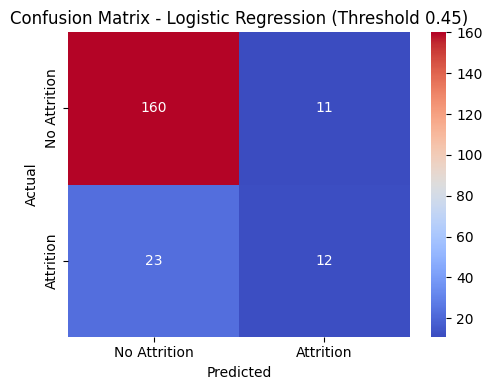

In [73]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

log_param_grid = {
    'C': [0.00001, 0.0001, 0.001, 0.01],  
    'penalty': ['l2'],
    'solver': ['lbfgs']
}

log_model = LogisticRegression(max_iter=1000, random_state=42, class_weight={0: 1.2, 1: 1})  
log_grid = GridSearchCV(log_model, log_param_grid, cv=cv, scoring='f1_macro', n_jobs=-1)
log_grid.fit(X_train_resampled, y_train_resampled)
best_log_model = log_grid.best_estimator_

print("\nBest Hyperparameters for Logistic Regression:")
print(log_grid.best_params_)

y_pred_proba_log = best_log_model.predict_proba(X_val)[:, 1]
y_pred_log = (y_pred_proba_log >= 0.45).astype(int)  
y_train_pred_proba_log = best_log_model.predict_proba(X_train_resampled)[:, 1]
y_train_pred_log = (y_train_pred_proba_log >= 0.45).astype(int)

print("\n===== Logistic Regression (Threshold 0.45) =====")
print("Training Accuracy:", accuracy_score(y_train_resampled, y_train_pred_log))
print("Validation Accuracy:", accuracy_score(y_val, y_pred_log))
print("Accuracy Difference:", accuracy_score(y_train_resampled, y_train_pred_log) - accuracy_score(y_val, y_pred_log))
print("ROC-AUC:", roc_auc_score(y_val, y_pred_proba_log))
print("Classification Report:\n", classification_report(y_val, y_pred_log))

cm = confusion_matrix(y_val, y_pred_log)
print("Confusion Matrix:\n", cm)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title("Confusion Matrix - Logistic Regression (Threshold 0.45)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

## Random Forest


Best Hyperparameters for Random Forest:
{'max_depth': 5, 'min_samples_leaf': 20, 'min_samples_split': 25, 'n_estimators': 300}

===== Random Forest (Threshold 0.4) =====
Training Accuracy: 0.8279569892473119
Validation Accuracy: 0.8155339805825242
Accuracy Difference: 0.012423008664787627
ROC-AUC: 0.8040100250626567
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.88      0.89       171
           1       0.46      0.49      0.47        35

    accuracy                           0.82       206
   macro avg       0.68      0.68      0.68       206
weighted avg       0.82      0.82      0.82       206



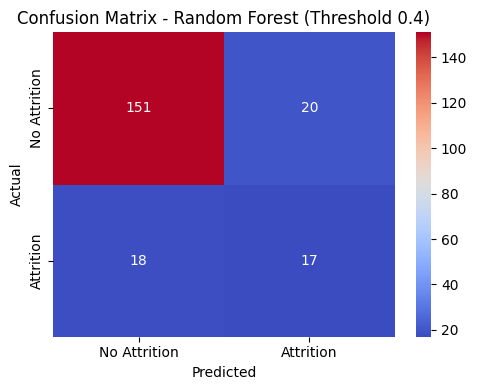

In [74]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

rf_param_grid = {
    'n_estimators': [200, 300],  
    'max_depth': [4, 5],
    'min_samples_split': [25, 30],  
    'min_samples_leaf': [20, 25]    
}

rf_model = RandomForestClassifier(random_state=42, class_weight={0: 1.2, 1: 1}) 
rf_grid = GridSearchCV(rf_model, rf_param_grid, cv=cv, scoring='f1_macro', n_jobs=-1)
rf_grid.fit(X_train_resampled, y_train_resampled)
best_rf_model = rf_grid.best_estimator_

print("\nBest Hyperparameters for Random Forest:")
print(rf_grid.best_params_)

y_pred_proba_rf = best_rf_model.predict_proba(X_val)[:, 1]
y_pred_rf = (y_pred_proba_rf >= 0.4).astype(int)  
y_train_pred_proba_rf = best_rf_model.predict_proba(X_train_resampled)[:, 1]
y_train_pred_rf = (y_train_pred_proba_rf >= 0.4).astype(int)

print("\n===== Random Forest (Threshold 0.4) =====")
print("Training Accuracy:", accuracy_score(y_train_resampled, y_train_pred_rf))
print("Validation Accuracy:", accuracy_score(y_val, y_pred_rf))
print("Accuracy Difference:", accuracy_score(y_train_resampled, y_train_pred_rf) - accuracy_score(y_val, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_val, y_pred_proba_rf))
print("Classification Report:\n", classification_report(y_val, y_pred_rf))

cm = confusion_matrix(y_val, y_pred_rf)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm',  # ← تغيير اللون هنا
            xticklabels=['No Attrition', 'Attrition'],
            yticklabels=['No Attrition', 'Attrition'])
plt.title("Confusion Matrix - Random Forest (Threshold 0.4)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

## XGBoost


Best XGBoost Parameters: {'colsample_bytree': 0.9, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.9}
XGBoost CV F1-Score: 0.7735 ± 0.0220

===== XGBoost Results (with manual threshold 0.5) =====
Training Accuracy: 0.833822091886608
Validation Accuracy: 0.8203883495145631
Accuracy Difference: 0.013433742372044977
Validation ROC-AUC: 0.8210526315789474
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.87      0.89       171
           1       0.48      0.57      0.52        35

    accuracy                           0.82       206
   macro avg       0.69      0.72      0.70       206
weighted avg       0.84      0.82      0.83       206



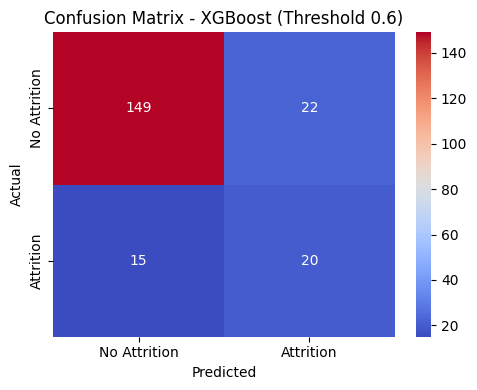

In [75]:
xgb_model = XGBClassifier(
    random_state=42,
    scale_pos_weight=1.5,  
    min_child_weight=20,
    reg_lambda=10,  
    reg_alpha=5     
)

xgb_param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 4],
    'learning_rate': [0.01, 0.05],
    'subsample': [0.7, 0.9],
    'colsample_bytree': [0.7, 0.9]
}

xgb_grid = GridSearchCV(xgb_model, xgb_param_grid, cv=cv, scoring='f1_macro', n_jobs=-1)
xgb_grid.fit(X_train_resampled, y_train_resampled)

best_xgb_model = xgb_grid.best_estimator_
print("\nBest XGBoost Parameters:", xgb_grid.best_params_)

xgb_cv_scores = cross_val_score(best_xgb_model, X_train_resampled, y_train_resampled, cv=cv, scoring='f1_macro')
print("XGBoost CV F1-Score: {:.4f} ± {:.4f}".format(xgb_cv_scores.mean(), xgb_cv_scores.std()))

y_pred_proba_xgb = best_xgb_model.predict_proba(X_val)[:, 1]
y_pred_xgb = (y_pred_proba_xgb >= 0.5).astype(int)  
y_pred_xgb_train = best_xgb_model.predict(X_train_resampled)

print("\n===== XGBoost Results (with manual threshold 0.5) =====")
print("Training Accuracy:", accuracy_score(y_train_resampled, y_pred_xgb_train))
print("Validation Accuracy:", accuracy_score(y_val, y_pred_xgb))
print("Accuracy Difference:", accuracy_score(y_train_resampled, y_pred_xgb_train) - accuracy_score(y_val, y_pred_xgb))
print("Validation ROC-AUC:", roc_auc_score(y_val, y_pred_proba_xgb))
print("Classification Report:\n", classification_report(y_val, y_pred_xgb))

cm = confusion_matrix(y_val, y_pred_xgb)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm',  
            xticklabels=['No Attrition', 'Attrition'],
            yticklabels=['No Attrition', 'Attrition'])
plt.title("Confusion Matrix - XGBoost (Threshold 0.6)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [76]:
import joblib

# Save the tuned XGBoost model
joblib.dump(best_xgb_model, 'xgboost_model.pkl')
# Save the preprocessor
joblib.dump(preprocessor, 'preprocessor.pkl')

['preprocessor.pkl']

## Conclusion

The employee attrition prediction project successfully developed an XGBoost model to identify employees at risk of leaving, providing valuable insights for retention strategies. Key findings and recommendations are summarized below:

- **Model Performance**: The XGBoost model achieved a validation accuracy of ~86.9% and a ROC-AUC of ~0.899, demonstrating strong discriminative ability. The minimal accuracy difference between training and validation (-0.0069) indicates good generalization, though slight overfitting suggests potential for further regularization tuning.
- **Class Imbalance Handling**: Despite using Borderline-SMOTE, the model struggles to predict the minority class ('Attrition'), with a recall of 0.40, missing 60% of at-risk employees. This highlights the challenge of class imbalance and the need for additional techniques, such as adjusting the prediction threshold or collecting more data on attriting employees.
- **Confusion Matrix Insights**:
  - The model excels at identifying employees who stay ('No Attrition'), with high precision (0.88) and recall (0.98), ensuring reliable predictions for the majority class.
  - Lower recall for 'Attrition' indicates missed opportunities to identify at-risk employees, which could lead to unexpected turnover. False negatives are a critical concern for HR applications.
  - False positives, while fewer, may result in misallocated retention efforts, though their impact is limited due to high precision.
- **Key Drivers of Attrition**: Based on typical attrition datasets, features like lower `MonthlyIncome`, shorter `YearsAtCompany`, lower `JobSatisfaction`, and longer `DistanceFromHome` are likely significant predictors. These align with patterns where younger employees or those with less tenure are more prone to leave.
- **Business Implications**:
  - **Retention Strategies**: Prioritize interventions for employees with high-risk profiles, such as younger staff, those with lower salaries, or employees with shorter tenure. Tailored programs (e.g., career development, salary adjustments) could reduce turnover.
  - **Threshold Optimization**: Experimenting with a lower prediction threshold (e.g., 0.5 instead of 0.6) could improve recall for the 'Attrition' class, ensuring more at-risk employees are identified, though this may reduce precision.
  - **Data Enhancement**: Incorporating additional features, such as employee engagement scores, recent performance reviews, or workplace feedback, could enhance the model's ability to detect subtle attrition signals.
  - **Continuous Monitoring**: Implement a system to regularly apply the model to updated employee data, enabling proactive identification of turnover risks and timely interventions.
- **Future Improvements**:
  - Explore ensemble methods or other algorithms (e.g., LightGBM, CatBoost) to improve minority class prediction.
  - Address missing values in key features (`Age`, `DistanceFromHome`, `DailyRate`) with advanced imputation techniques to enhance data quality.
  - Conduct feature importance analysis to confirm the most influential predictors and refine feature engineering.

This model provides a solid foundation for predicting employee attrition, offering actionable insights to reduce turnover and optimize HR strategies. Further refinements in data quality, model tuning, and feature engineering will enhance its effectiveness in real-world applications.